In [3]:
from google.colab import files
uploaded = files.upload()

Saving nba.xlsx to nba (1).xlsx


In [4]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from patsy.builtins import *
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelBinarizer

In [5]:
nba_2016 = pd.read_excel("nba.xlsx",sheet_name="2016")
nba_2017 = pd.read_excel("nba.xlsx",sheet_name="2017")
nba_2018 = pd.read_excel("nba.xlsx",sheet_name="2018")
nba_2019 = pd.read_excel("nba.xlsx",sheet_name="2019")
nba_2020 = pd.read_excel("nba.xlsx",sheet_name="2020")

nba = pd.concat([nba_2016, nba_2017, nba_2018, nba_2019, nba_2020], ignore_index=True)
nba.head()

,tm,nameTeam,year,conference,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
0,BOS,Boston Celtics,2016,East,53,29,0.646,6116521,93465326,6.18,25.2
1,CLE,Cleveland Cavaliers,2016,East,51,31,0.622,9105825,128522489,12.06,22.7
2,TOR,Toronto Raptors,2016,East,51,31,0.622,7158464,108599970,4.57,18.5
3,WAS,Washington Wizards,2016,East,49,33,0.598,5384491,104016580,5.21,23.9
4,ATL,Atlanta Hawks,2016,East,43,39,0.524,5411801,96315163,5.96,23.6


In [6]:
nba.describe()

,year,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
count,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000
mean,2018.000000,38.860000,38.860000,0.498980,7.442426e+06,1.157086e+08,6.757667,23.924000
std,1.418951,11.649253,11.226186,0.143338,2.173739e+06,1.712834e+07,2.800616,2.116781
min,2016.000000,15.000000,15.000000,0.207000,3.337967e+06,7.918008e+07,3.020000,18.500000
25%,2017.000000,31.000000,31.000000,0.390000,5.892290e+06,1.024146e+08,5.187500,22.500000
50%,2018.000000,41.000000,39.000000,0.506000,7.298772e+06,1.178138e+08,6.150000,23.800000
75%,2019.000000,48.000000,46.750000,0.610000,8.994351e+06,1.289372e+08,7.450000,25.500000
max,2020.000000,67.000000,65.000000,0.817000,1.413781e+07,1.711053e+08,27.640000,30.400000


In [7]:
nba.groupby('tm').mean()

<ipython-input-7-c42f92003525>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nba.groupby('tm').mean()


,year,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
tm,,,,,,,,
ATL,2018.0,31.4,45.6,0.4078,4978168.6,95978412.4,6.176,24.24
BOS,2018.0,48.2,29.8,0.6164,8883357.6,116955198.4,6.864,24.10
BRK,2018.0,34.6,43.4,0.4500,8026218.6,116947911.0,6.642,24.04
CHI,2018.0,28.6,48.0,0.3732,4757403.0,107430557.8,5.938,23.60
CHO,2018.0,33.4,43.2,0.4332,7377925.6,109327073.8,5.464,23.70
CLE,2018.0,32.2,44.4,0.4124,8839223.0,129765428.8,7.336,22.74
DAL,2018.0,35.0,43.6,0.4506,6471512.4,104626599.4,6.824,22.90
DEN,2018.0,46.6,31.6,0.5982,8035904.2,113629293.0,6.046,26.26
DET,2018.0,31.4,45.4,0.4016,7926317.8,114878657.2,6.224,22.94


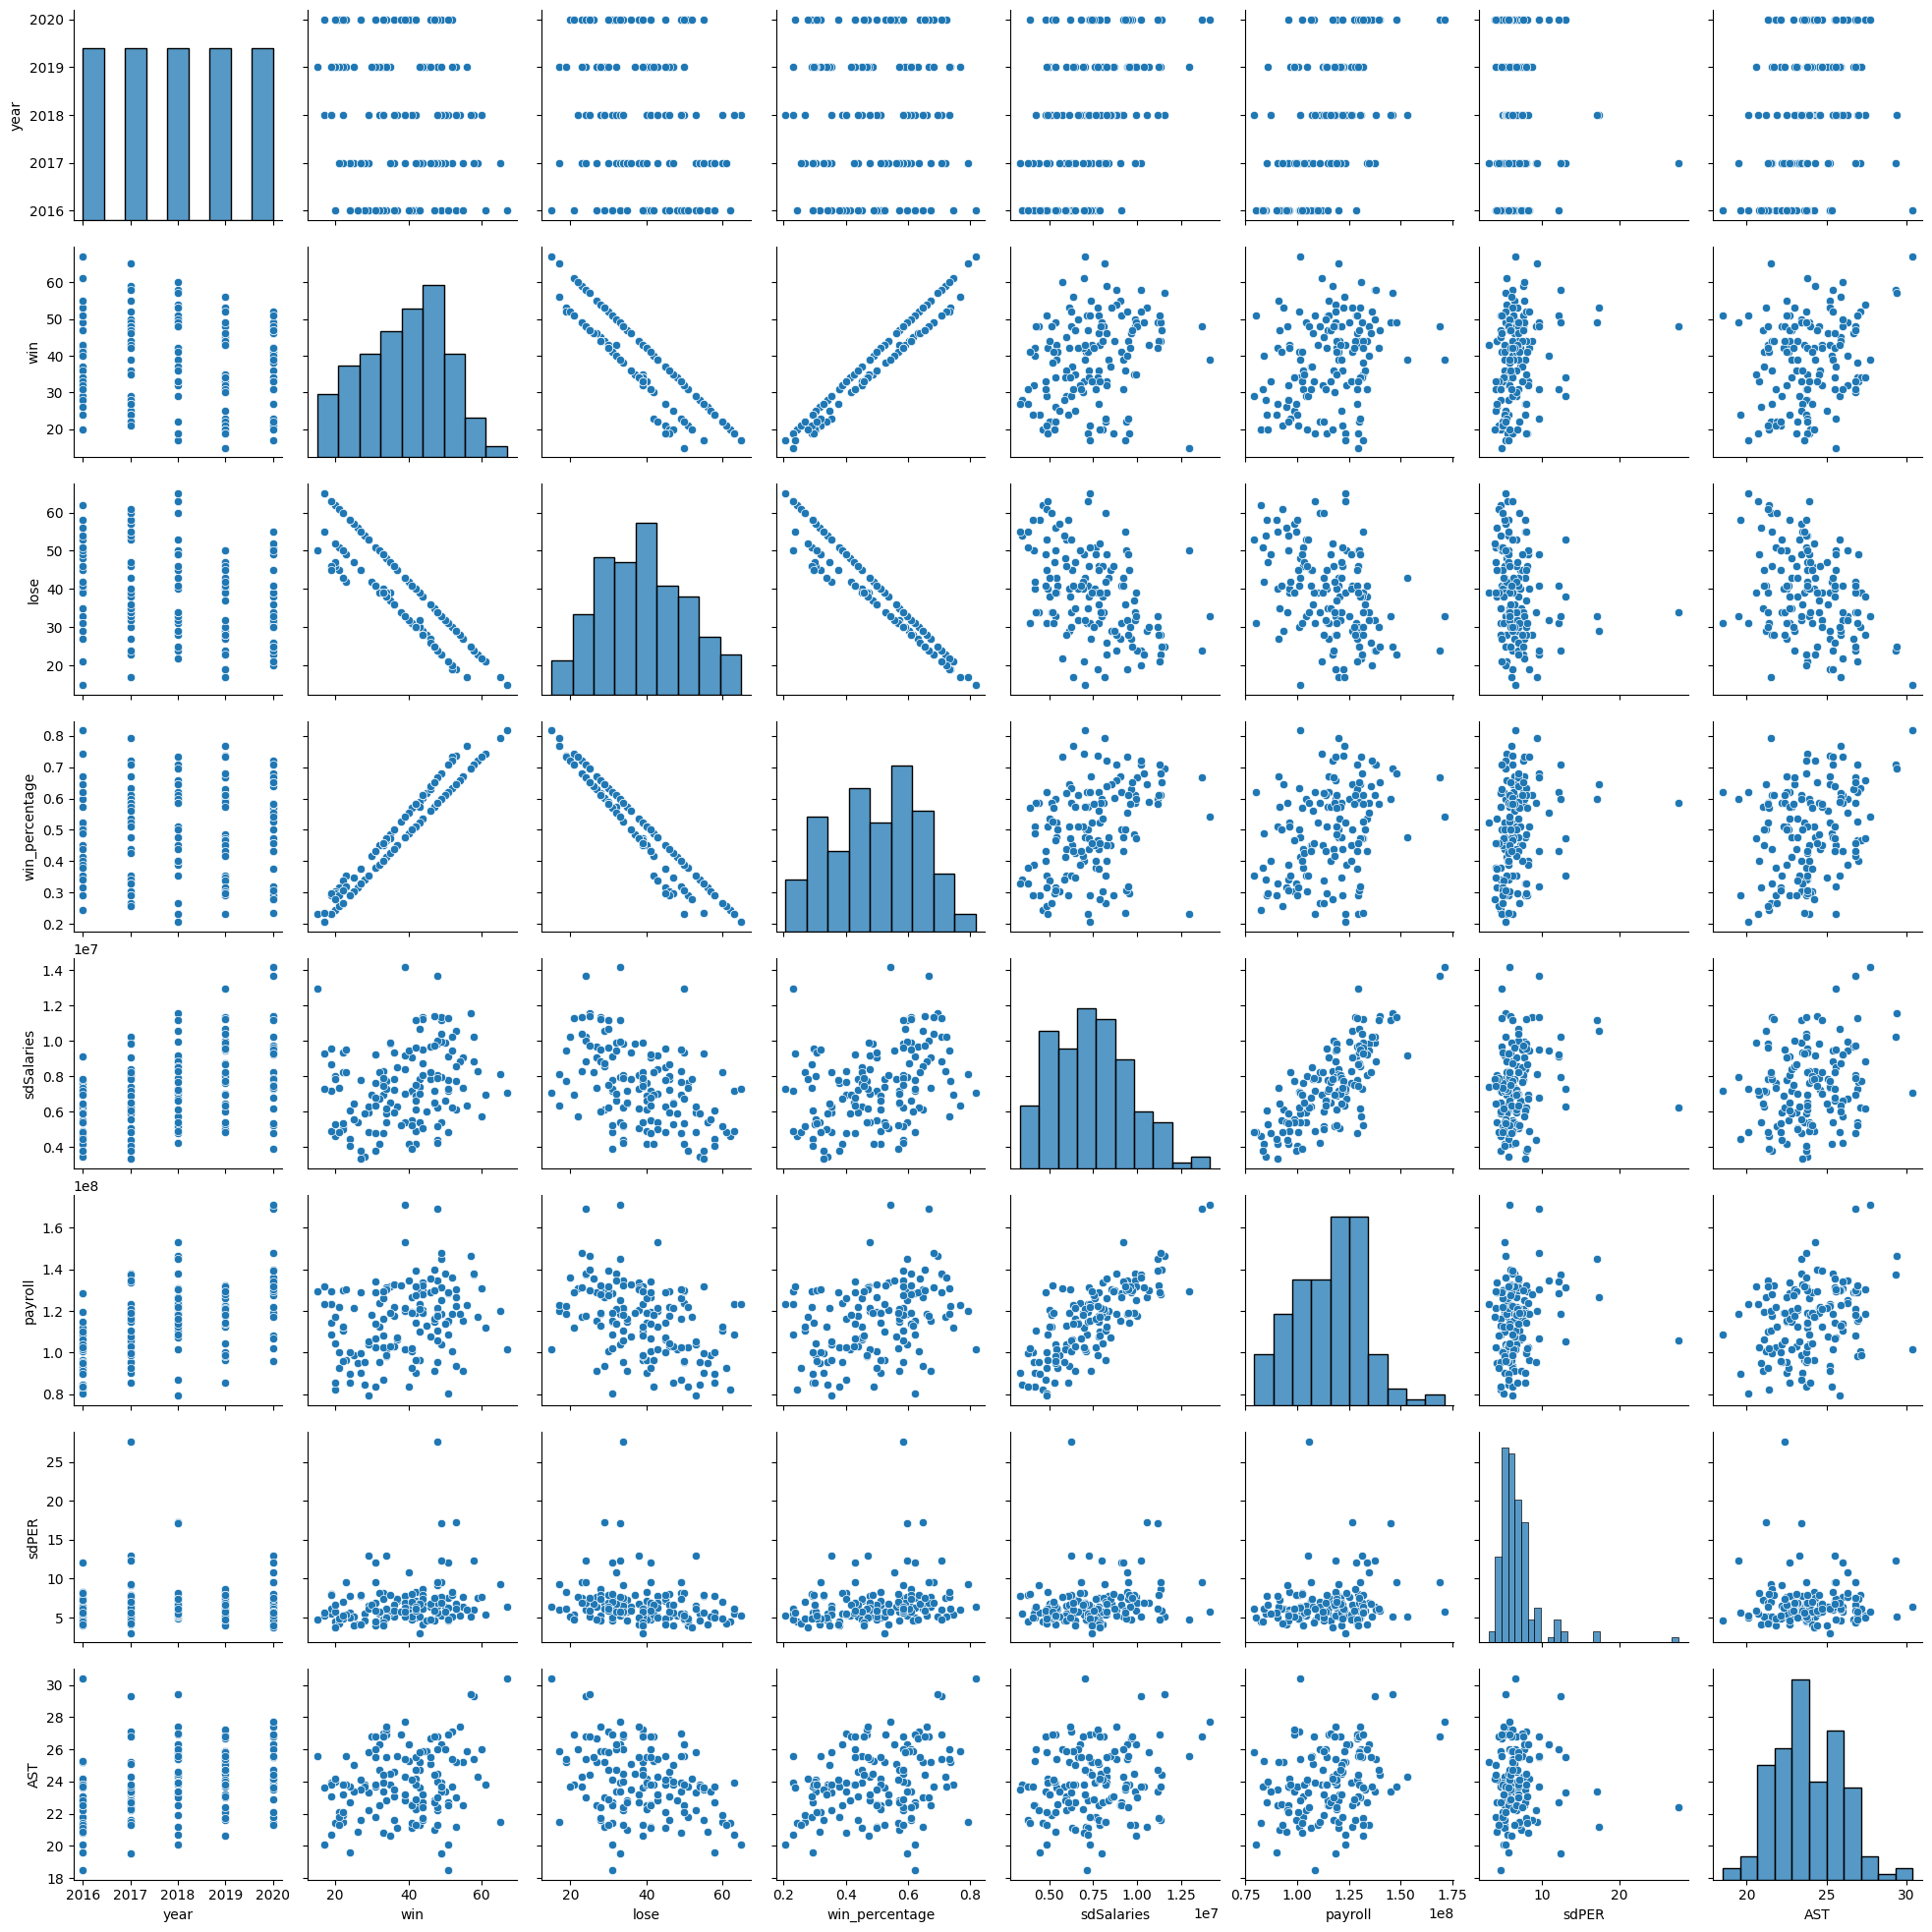

In [8]:
sns.pairplot(nba)

Text(0, 0.5, 'win_percentage')

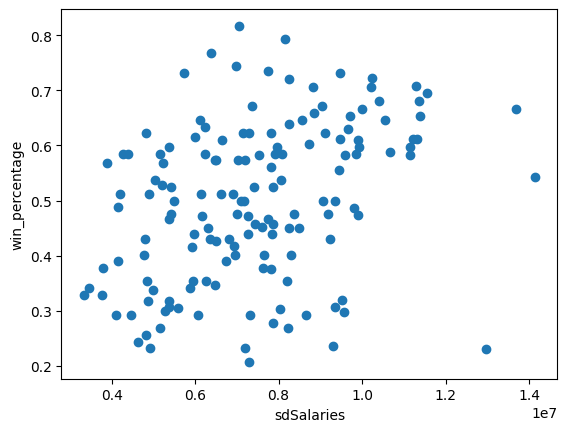

In [9]:
x=nba["sdSalaries"]
y=nba["win_percentage"]
plt.scatter(x, y)
plt.xlabel("sdSalaries")
plt.ylabel("win_percentage")

In [10]:
X = nba["sdSalaries"]
y = nba["win_percentage"]
X = sm.add_constant(X)

model = sm.OLS(y,X).fit(cov_type = 'HC1')

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     21.24
Date:                Tue, 02 May 2023   Prob (F-statistic):           8.68e-06
Time:                        06:24:57   Log-Likelihood:                 89.441
No. Observations:                 150   AIC:                            -174.9
Df Residuals:                     148   BIC:                            -168.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3224      0.039      8.290      0.0

In [11]:
nba_2 = nba.copy()
nba_2["sdSalaries"] = nba_2["sdSalaries"]/1000000

nba_2.head()

,tm,nameTeam,year,conference,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
0,BOS,Boston Celtics,2016,East,53,29,0.646,6.116521,93465326,6.18,25.2
1,CLE,Cleveland Cavaliers,2016,East,51,31,0.622,9.105825,128522489,12.06,22.7
2,TOR,Toronto Raptors,2016,East,51,31,0.622,7.158464,108599970,4.57,18.5
3,WAS,Washington Wizards,2016,East,49,33,0.598,5.384491,104016580,5.21,23.9
4,ATL,Atlanta Hawks,2016,East,43,39,0.524,5.411801,96315163,5.96,23.6


In [12]:
nba_2.describe()

,year,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000
mean,2018.000000,38.860000,38.860000,0.498980,7.442426,1.157086e+08,6.757667,23.924000
std,1.418951,11.649253,11.226186,0.143338,2.173739,1.712834e+07,2.800616,2.116781
min,2016.000000,15.000000,15.000000,0.207000,3.337967,7.918008e+07,3.020000,18.500000
25%,2017.000000,31.000000,31.000000,0.390000,5.892290,1.024146e+08,5.187500,22.500000
50%,2018.000000,41.000000,39.000000,0.506000,7.298771,1.178138e+08,6.150000,23.800000
75%,2019.000000,48.000000,46.750000,0.610000,8.994351,1.289372e+08,7.450000,25.500000
max,2020.000000,67.000000,65.000000,0.817000,14.137812,1.711053e+08,27.640000,30.400000


Text(0, 0.5, 'win_percentage')

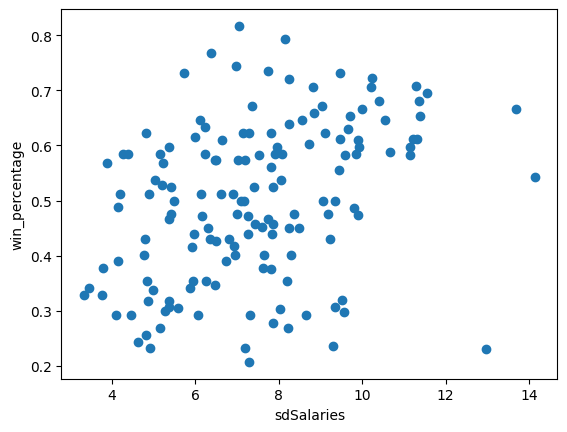

In [13]:
x=nba_2["sdSalaries"]
y=nba_2["win_percentage"]
plt.scatter(x, y)
plt.xlabel("sdSalaries")
plt.ylabel("win_percentage")

In [14]:
X = nba_2["sdSalaries"]
y = nba_2["win_percentage"]
X = sm.add_constant(X)

model2 = sm.OLS(y,X).fit(cov_type = 'HC1')

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     21.24
Date:                Tue, 02 May 2023   Prob (F-statistic):           8.68e-06
Time:                        06:24:57   Log-Likelihood:                 89.441
No. Observations:                 150   AIC:                            -174.9
Df Residuals:                     148   BIC:                            -168.9
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3224      0.039      8.290      0.0

eval_env: 1
eval_env: 1


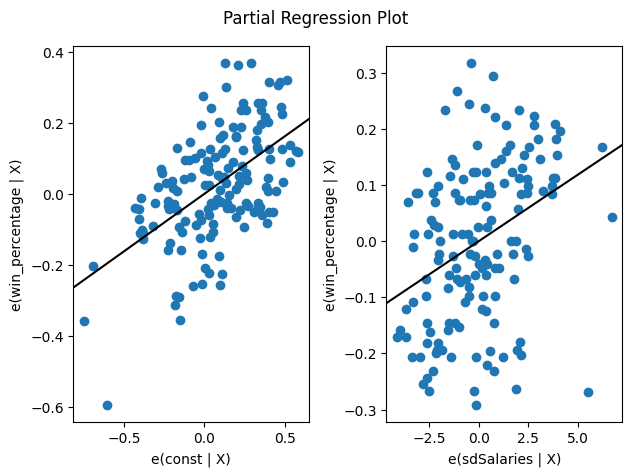

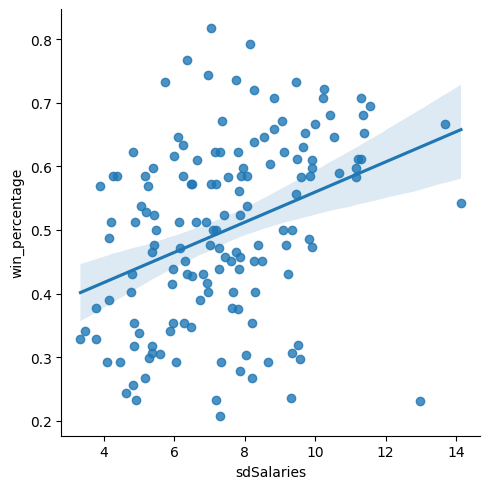

In [15]:
fig = sm.graphics.plot_partregress_grid(model2)
fig.tight_layout(pad=1.0)
sns.lmplot(x='sdSalaries',y='win_percentage',data=nba_2)

In [16]:
nba_3 = nba_2.copy()
nba_3["sdSalaries"] = np.log(nba_3["sdSalaries"])
nba_3.head()

,tm,nameTeam,year,conference,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
0,BOS,Boston Celtics,2016,East,53,29,0.646,1.810993,93465326,6.18,25.2
1,CLE,Cleveland Cavaliers,2016,East,51,31,0.622,2.208914,128522489,12.06,22.7
2,TOR,Toronto Raptors,2016,East,51,31,0.622,1.968295,108599970,4.57,18.5
3,WAS,Washington Wizards,2016,East,49,33,0.598,1.683523,104016580,5.21,23.9
4,ATL,Atlanta Hawks,2016,East,43,39,0.524,1.688582,96315163,5.96,23.6


Text(0, 0.5, 'win_percentage')

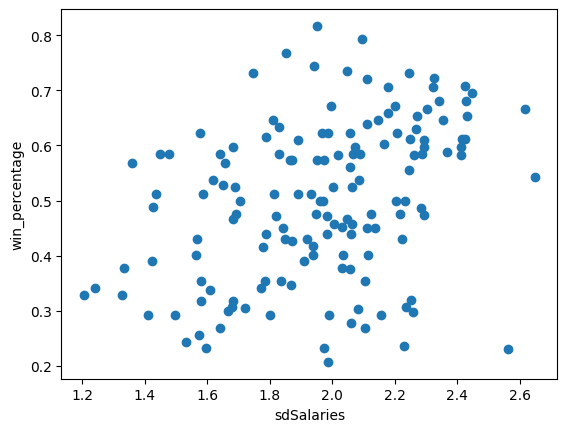

In [17]:
x=nba_3["sdSalaries"]
y=nba_3["win_percentage"]
plt.scatter(x, y)
plt.xlabel("sdSalaries")
plt.ylabel("win_percentage")

In [18]:
X['sdSalaries'] = nba_3['sdSalaries']
y = nba_3["win_percentage"]


model3 = sm.OLS(y,X).fit(cov_type = 'HC1')

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     25.75
Date:                Tue, 02 May 2023   Prob (F-statistic):           1.15e-06
Time:                        06:24:59   Log-Likelihood:                 89.866
No. Observations:                 150   AIC:                            -175.7
Df Residuals:                     148   BIC:                            -169.7
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1552      0.068      2.297      0.0

In [19]:
X['sdSalaries'] = nba_3['sdSalaries']
X['sdPER'] = nba_3['sdPER']
X['AST'] = nba_3['AST']
y = nba_3["win_percentage"]


model3 = sm.OLS(y,X).fit(cov_type = 'HC1')

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     15.94
Date:                Tue, 02 May 2023   Prob (F-statistic):           5.11e-09
Time:                        06:24:59   Log-Likelihood:                 96.926
No. Observations:                 150   AIC:                            -185.9
Df Residuals:                     146   BIC:                            -173.8
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2102      0.134     -1.574      0.1

In [20]:
 nba_3.corr()


<ipython-input-20-bc45a6229270>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nba_3.corr()


,year,win,lose,win_percentage,sdSalaries,payroll,sdPER,AST
year,1.000000,-0.191236,-0.198443,-0.004884,0.416433,0.563999,0.006367,0.367790
win,-0.191236,1.000000,-0.885927,0.974355,0.280024,0.263094,0.232596,0.233250
lose,-0.198443,-0.885927,1.000000,-0.961758,-0.453519,-0.430301,-0.206039,-0.348485
win_percentage,-0.004884,0.974355,-0.961758,1.000000,0.366566,0.353580,0.222180,0.288534
sdSalaries,0.416433,0.280024,-0.453519,0.366566,1.000000,0.763622,0.174198,0.200257
payroll,0.563999,0.263094,-0.430301,0.353580,0.763622,1.000000,0.150677,0.280347
sdPER,0.006367,0.232596,-0.206039,0.222180,0.174198,0.150677,1.000000,-0.013125
AST,0.367790,0.233250,-0.348485,0.288534,0.200257,0.280347,-0.013125,1.000000


<ipython-input-21-aa83570863fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(nba_3.corr(),annot=True,cmap='YlGnBu')


<Axes: >

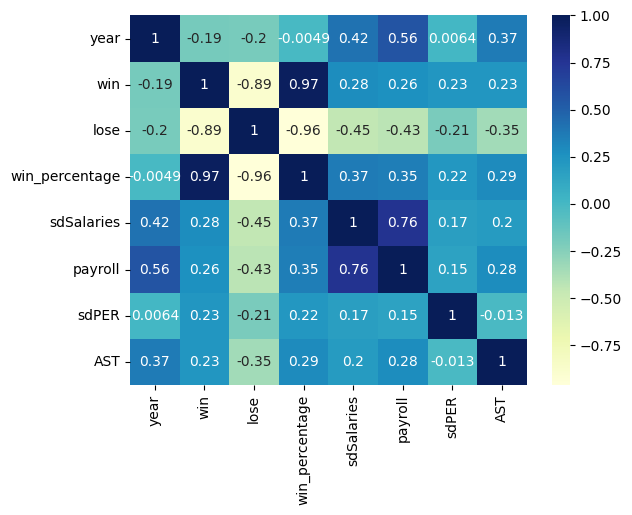

In [21]:
sns.heatmap(nba_3.corr(),annot=True,cmap='YlGnBu')

In [22]:
nba_3['conference']
conf = LabelBinarizer().fit_transform(nba_3['conference'])
print(conf)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [25]:
X['sdSalaries'] = nba_3['sdSalaries']
X['sdPER'] = nba_3['sdPER']
X['AST'] = nba_3['AST']
X['conference'] = conf
y = nba_3["win_percentage"]


model3 = sm.OLS(y,X).fit(cov_type = 'HC1')

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:         win_percentage   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     11.93
Date:                Tue, 02 May 2023   Prob (F-statistic):           2.09e-08
Time:                        06:26:27   Log-Likelihood:                 97.062
No. Observations:                 150   AIC:                            -184.1
Df Residuals:                     145   BIC:                            -169.1
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2095      0.134     -1.568      0.1